In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data and taking a look at it
df = pd.read_csv('/Users/albertomartinezgarcia/Downloads/conversions_data_set.csv')
df

,week,browser,country,website_visits,conversions
0,0,chrome,Country_A,120828,13394
1,0,chrome,Country_B,9021,1615
2,0,chrome,Country_C,50840,37517
3,0,chrome,Country_D,60197,19994
4,0,chrome,Country_E,17865,14637
...,...,...,...,...,...
795,19,safari,Country_F,35527,2941
796,19,safari,Country_G,16747,1632
797,19,safari,Country_H,223081,65605
798,19,safari,Country_I,54423,1002


# Data cleaning
I seek to check the data, and clean it if needed, using the following criteria:

1. Missing data
2. Data types
3. Duplicates
4. Values ​​equal to zero
5. Extreme values and data behavior

In [3]:
# Seeing if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

week - 0.0%
browser - 0.0%
country - 0.0%
website_visits - 0.0%
conversions - 0.0%


There is not missing data.

In [4]:
# Verifying the data types for the columns
df.dtypes

week               int64
browser           object
country           object
website_visits     int64
conversions        int64
dtype: object

I will change the 'week' column to an object type because I will be using the number of the week as categorical data, not as numerical. 

In [5]:
df['week'] = df['week'].astype(str)

print(df.dtypes)

week              object
browser           object
country           object
website_visits     int64
conversions        int64
dtype: object


In [6]:
# Checking if there are any duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}')

Duplicate rows: 0


There are no duplicate rows, so there is no need to remove them.

In [7]:
# Ensuring consistent naming, so visualizations look sharper

# Changing browser naming to Sentence case
df['browser'] = df['browser'].str.strip().str.lower().replace(
    {'chrome': 'Chrome', 'safari': 'Safari', 'firefox': 'Firefox', 'edge': 'Edge'}
)

# Removing the prefix "Country_" from the country column
df['country'] = df['country'].str.replace('Country_', '')

df.head()

,week,browser,country,website_visits,conversions
0,0,Chrome,A,120828,13394
1,0,Chrome,B,9021,1615
2,0,Chrome,C,50840,37517
3,0,Chrome,D,60197,19994
4,0,Chrome,E,17865,14637


In [8]:
# Taking a quick glance at values for each column to see if there are any 0 values that should not be there
df.describe()

,website_visits,conversions
count,8.000000e+02,800.000000
mean,1.098017e+05,42542.035000
std,1.823889e+05,82182.138424
min,9.710000e+02,207.000000
25%,1.591950e+04,3190.750000
50%,4.033200e+04,13461.000000
75%,1.229515e+05,46549.750000
max,1.385433e+06,742349.000000


In [9]:
# Showing the describe in a normal notation
desc = df.describe().applymap(lambda x: '{:.2f}'.format(x))

print(desc)

      website_visits conversions
count         800.00      800.00
mean       109801.73    42542.04
std        182388.86    82182.14
min           971.00      207.00
25%         15919.50     3190.75
50%         40332.00    13461.00
75%        122951.50    46549.75
max       1385433.00   742349.00


The 'week' column starts with a 0, but the dataset came that way and it does not intervene with the analysis as it is acting as ordinal data.

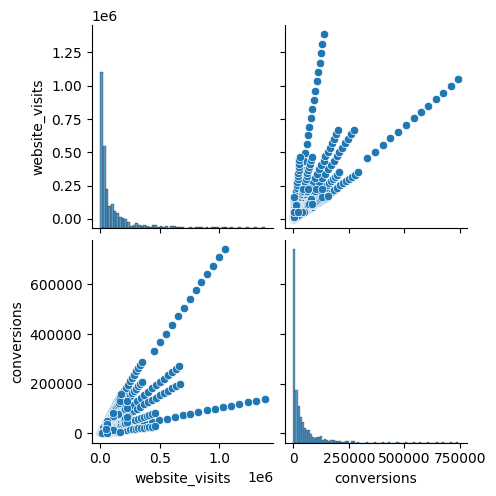

In [10]:
# Pairplot to verify data behavior and possible outliers
sns.pairplot(df);

It seems like the conversions and website_visits behave correctly, as their relation looks linear.

Taking everything thus far the data looks clean and consistent. So, I can now proceed with exploration.

# Data Exploration and visualization
First, I need to create a conversion_rate to have a better understanding of the overall data.

In [11]:
# Conversion rate
df['conversion_rate'] = df['conversions'] / df['website_visits'] * 100
df

,week,browser,country,website_visits,conversions,conversion_rate
0,0,Chrome,A,120828,13394,11.085179
1,0,Chrome,B,9021,1615,17.902672
2,0,Chrome,C,50840,37517,73.794256
3,0,Chrome,D,60197,19994,33.214280
4,0,Chrome,E,17865,14637,81.931150
...,...,...,...,...,...,...
795,19,Safari,F,35527,2941,8.278211
796,19,Safari,G,16747,1632,9.745029
797,19,Safari,H,223081,65605,29.408600
798,19,Safari,I,54423,1002,1.841133


In [12]:
# Sorting to identify the top 10 weeks with the highest conversion rates
df.sort_values(by='conversion_rate', ascending= False).head(10)

,week,browser,country,website_visits,conversions,conversion_rate
14,0,Firefox,E,2964,2821,95.175439
54,1,Firefox,E,4445,4219,94.915636
214,5,Firefox,E,10062,9520,94.613397
174,4,Firefox,E,8677,8205,94.560332
254,6,Firefox,E,11508,10878,94.525547
134,3,Firefox,E,7320,6919,94.521858
94,2,Firefox,E,5839,5512,94.399726
414,10,Firefox,E,16583,15640,94.313454
294,7,Firefox,E,12883,12137,94.209423
334,8,Firefox,E,14039,13220,94.166251


In [13]:
# Sorting to identify the top 10 weeks with the lowest conversion rates
df.sort_values(by='conversion_rate', ascending= False).tail(10)

,week,browser,country,website_visits,conversions,conversion_rate
438,10,Safari,I,33354,857,2.569407
478,11,Safari,I,36050,861,2.388350
518,12,Safari,I,38219,870,2.276355
558,13,Safari,I,40844,919,2.250024
598,14,Safari,I,42975,929,2.161722
638,15,Safari,I,45453,966,2.125272
678,16,Safari,I,47881,1002,2.092688
718,17,Safari,I,50141,976,1.946511
758,18,Safari,I,52233,992,1.899183
798,19,Safari,I,54423,1002,1.841133


Overall, this simple sorting shows many patterns in the data:
1. The highest conversion rates come from Firefox, and the lowest from Safari.
2. The country with the highest conversion rate is E, and the lowest is I.
3. The weeks with the highest conversion rates have >94.16%, and the lowest have <2.57%

To confirm this, and to identify patterns over time, I will start data segmentation by browser and then by country.

In [14]:
# Data segmentation by browser over time
browser_agg_df = df.groupby(['week', 'browser']).agg(
        total_visits=('website_visits', 'sum'),
        total_conversions=('conversions', 'sum')
    ).reset_index()
    
browser_agg_df['conversion_rate'] = (browser_agg_df['total_conversions'] / browser_agg_df['total_visits']) * 100

browser_agg_df

,week,browser,total_visits,total_conversions,conversion_rate
0,0,Chrome,363756,122468,33.667623
1,0,Edge,121923,55759,45.732963
2,0,Firefox,60540,35350,58.391146
3,0,Safari,121745,31424,25.811327
4,1,Chrome,547828,183420,33.481312
...,...,...,...,...,...
75,8,Safari,703328,204412,29.063538
76,9,Chrome,2319615,860880,37.113055
77,9,Edge,773420,378393,48.924646
78,9,Firefox,386579,236109,61.076520


Now I will create the graph for the week and browser aggregation

In [15]:
# Converting 'week' to a categorical type with a defined order so that weeks show like 0, 1, 2, 3, ...  instead of 0, 1, 10, 11, ...
week_order = [str(i) for i in range(20)]
browser_agg_df['week'] = pd.Categorical(browser_agg_df['week'], categories=week_order, ordered=True)

In [16]:
# Defining a palette for each browser
custom_palette = {
    'Chrome': 'gold',
    'Firefox': 'darkorange',
    'Safari': 'deepskyblue',
    'Edge': 'mediumseagreen'
}

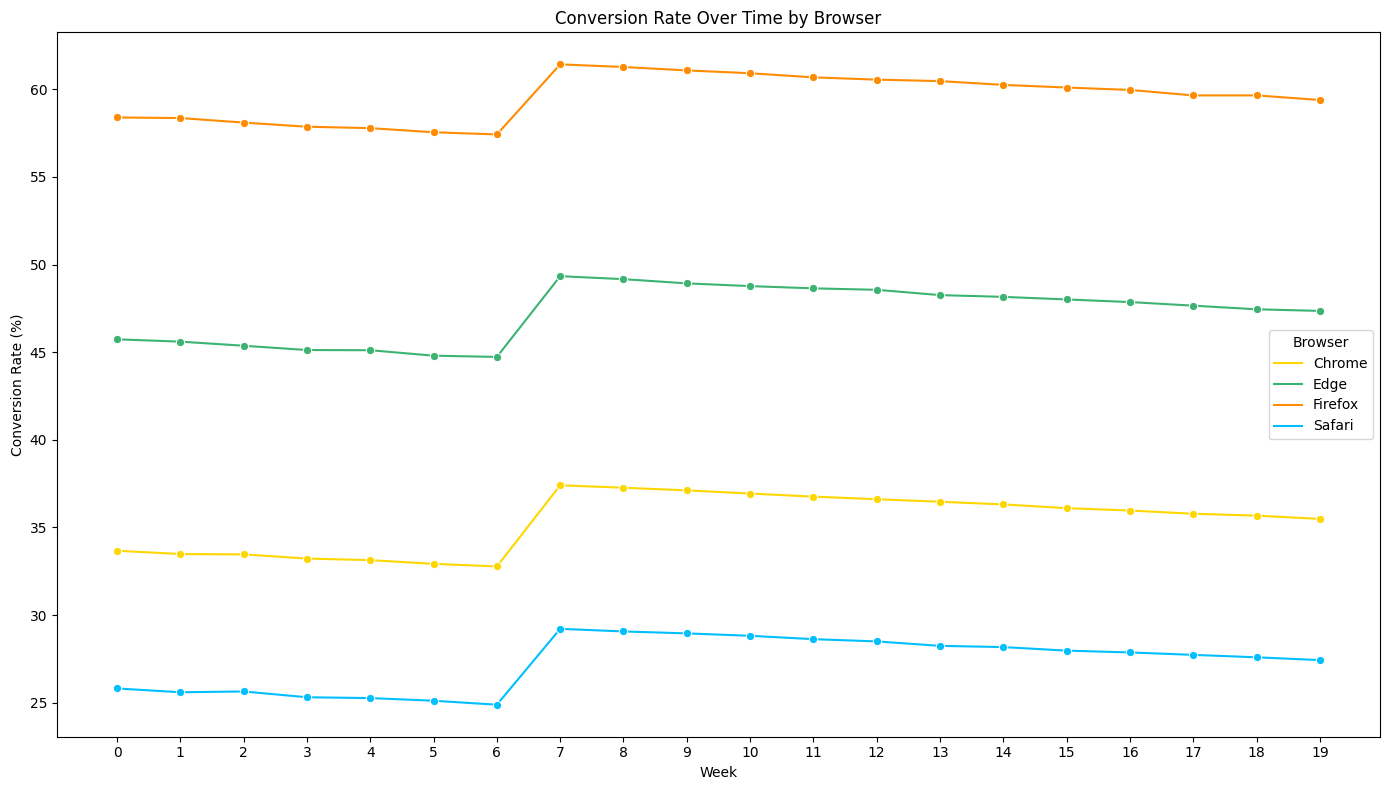

In [17]:
# Plotting the data segmentation by browser over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=browser_agg_df, x='week', y='conversion_rate', hue='browser', marker='o', palette=custom_palette)

# Aesthethic aspects of the graph    
plt.title('Conversion Rate Over Time by Browser')
plt.xlabel('Week')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Browser')
plt.tight_layout()
plt.show();

Seeing the graph, we can observe the following order that if we rank the browsers by conversion rate:
1. Firefox
2. Edge
3. Chrome
4. Safari

We can also notice that all of the browsers show the same trends, which are:
1. From week 0 to week 6, the conversion rate descends getting to a minimum in week 6.
2. There is a spike in week 7, where conversion rate gets to a maximum. Then it descends again, but with higher conversion rates than the first 6 weeks.


What is also worth mentioning is that there is a difference of approximately 10% in conversion rate between each position.

Also, there is a huge difference in conversion rate amongst the highest week (week 7 in Firefox, with a >60%) and the lowest week (week 6 in Safari, with a <29% rate).

Now I will proceed to data segmentation by country

In [18]:
# Data segmentation by country over time

country_agg_df = df.groupby(['week', 'country']).agg(
        total_visits=('website_visits', 'sum'),
        total_conversions=('conversions', 'sum')
    ).reset_index()
    
country_agg_df['conversion_rate'] = (country_agg_df['total_conversions'] / country_agg_df['total_visits']) * 100

country_agg_df

,week,country,total_visits,total_conversions,conversion_rate
0,0,A,221511,30956,13.974927
1,0,B,16517,3537,21.414300
2,0,C,93561,70672,75.535747
3,0,D,110719,41393,37.385634
4,0,E,32667,27100,82.958337
...,...,...,...,...,...
195,9,F,96871,16365,16.893601
196,9,G,54800,10955,19.990876
197,9,H,622341,284982,45.791937
198,9,I,169201,9449,5.584482


Now I will create the graph for the week and country segmentation

In [19]:
# Converting 'week' to a categorical type with a defined order so that weeks show like 0, 1, 2, 3, ...  instead of 0, 1, 10, 11, ...
week_order = [str(i) for i in range(20)]
country_agg_df['week'] = pd.Categorical(country_agg_df['week'], categories=week_order, ordered=True)

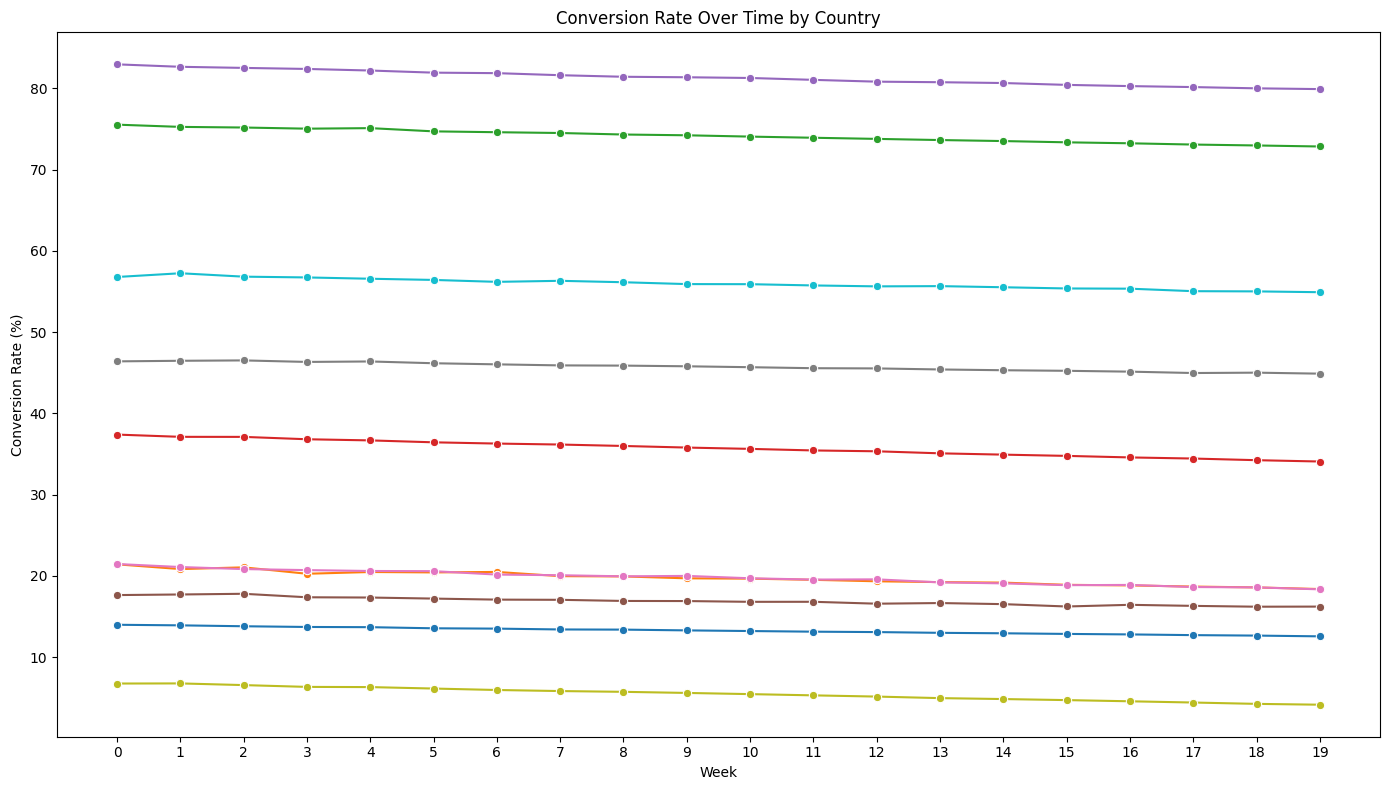

In [20]:
# Plotting the data segmentation by country over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=country_agg_df, x='week', y='conversion_rate', hue='country', marker='o', legend=False)

# Aesthetic aspects of the graph
plt.title('Conversion Rate Over Time by Country')
plt.xlabel('Week')
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()

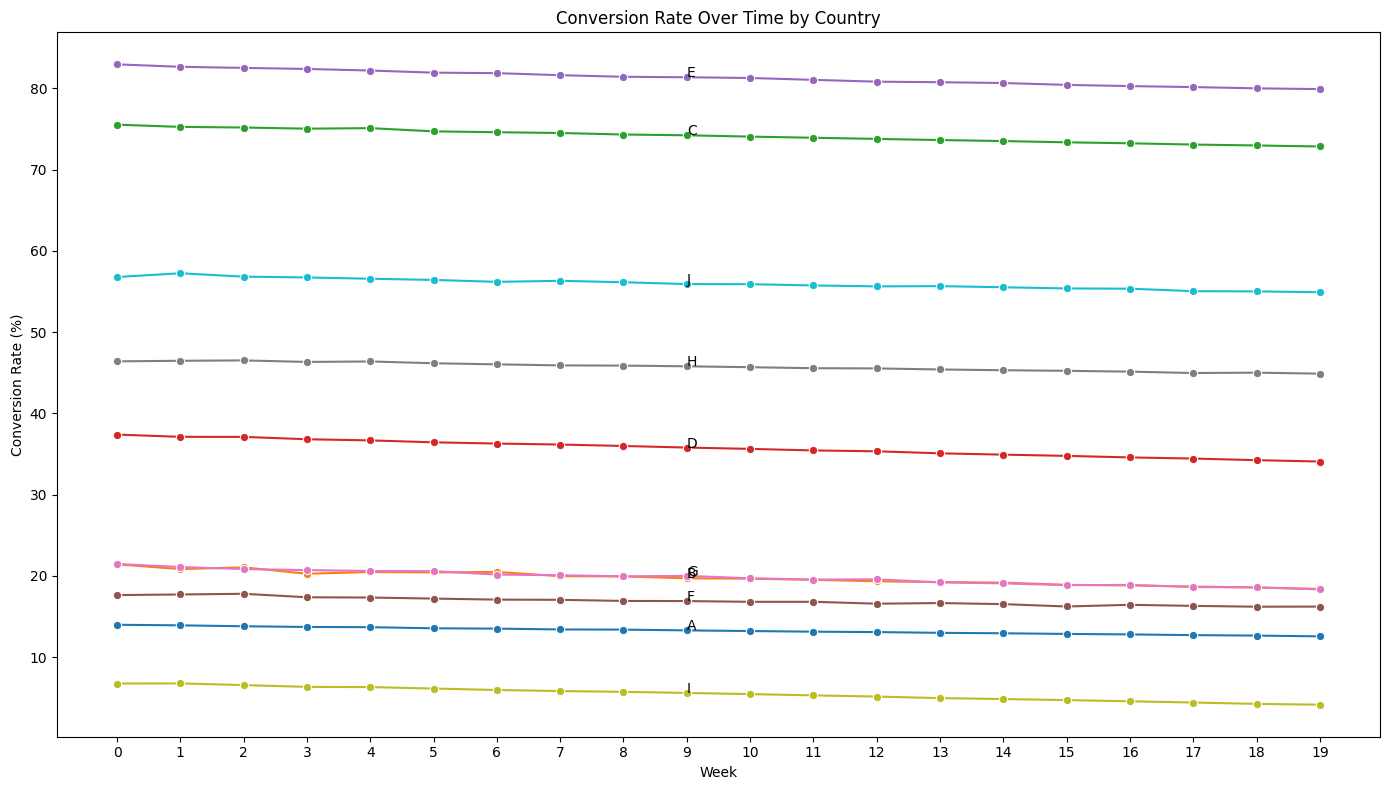

In [21]:
# Plotting the data segmentation by country over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=country_agg_df, x='week', y='conversion_rate', hue='country', marker='o', legend=False)


for country, data in country_agg_df.groupby('country'):
        plt.text(data['week'].iloc[-1], data['conversion_rate'].iloc[-1], country, horizontalalignment='left', size='medium', color='black')

# Aesthetic aspects of the graph
plt.title('Conversion Rate Over Time by Country')
plt.xlabel('Week')
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()
    

After seeing the graph, the ranking of countries by conversion rate is: E, C, J, H, D, G, B, F, A, I.

The difference between the top and the lowest countries is huge. There is a more than 75% difference between country E and I.

As with browsers, countries also appear to shows the same trends. However the trend in countries is different, as the conversion rate for each country decreases very slightly from week 0 onwards and appears relatively stable.

Now, I will analize everything globally to have a better undestanding.

In [22]:
# Data aggregations by visits, conversions and conversion rate globally

aggregated_df = df.groupby('week').agg(
    total_visits=('website_visits', 'sum'),
    total_conversions=('conversions', 'sum')
).reset_index()

aggregated_df['conversion_rate'] = (aggregated_df['total_conversions'] / aggregated_df['total_visits']) * 100

In [23]:
# Converting 'week' to a categorical type with a defined order so that weeks show like 0, 1, 2, 3, ...  instead of 0, 1, 10, 11, ...
week_order = [str(i) for i in range(20)]
aggregated_df['week'] = pd.Categorical(aggregated_df['week'], categories=week_order, ordered=True)

In [24]:
# Changing the order of week so that weeks show like 0, 1, 2, 3, ...  instead of 0, 1, 10, 11, ...
aggregated_df = aggregated_df.sort_values(by='week')

In [25]:
# Set y-axis labels in normal notation and showing 1,000,000 values as 'M'

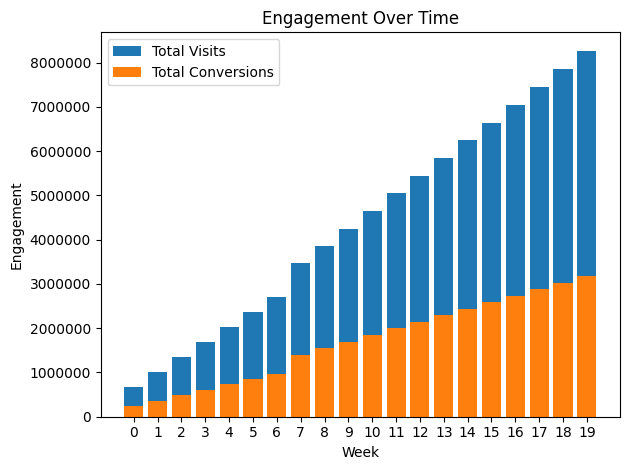

In [26]:
# Plot total visits and total conversions as bar graph
plt.bar(aggregated_df['week'], aggregated_df['total_visits'], label='Total Visits')
plt.bar(aggregated_df['week'], aggregated_df['total_conversions'], label='Total Conversions')

# Aesthetic aspects of the graph
plt.title('Engagement Over Time')
plt.xlabel('Week')
plt.ylabel('Engagement')
plt.legend()

# Set y-axis labels in normal notation and showing 1,000,000 values as 'M'
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

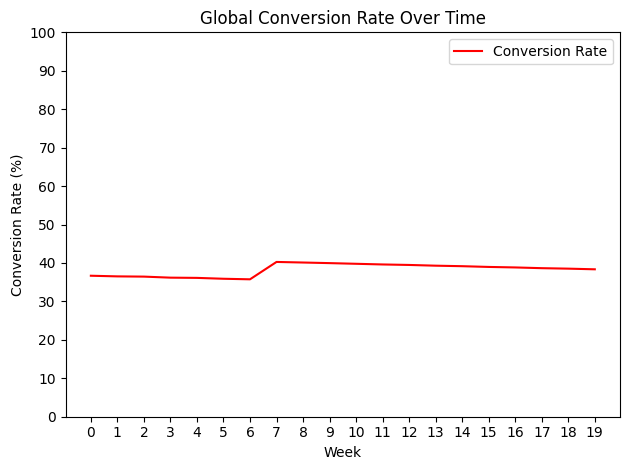

In [27]:
# Plot conversion rate as line graph

sns.lineplot(data=aggregated_df, x='week', y='conversion_rate', color='red', label='Conversion Rate')

# Aesthetic aspects of the graph
plt.title('Global Conversion Rate Over Time')
plt.xlabel('Week')
plt.ylabel('Conversion Rate (%)')

# Set the y-axis limits and ticks
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100
plt.yticks(range(0, 101, 10))  # Set the y-axis ticks from 0 to 100 in steps of 10

plt.legend()
plt.tight_layout()
plt.show()